<h1><center>Practice of Large Scale Machine Learning - TP1 Avazu<center></h1>
<h2><center>ATHENS 2018<center></h2>

#### For any remark or suggestion, please feel free to contact us at: 
#### pascal.bianchi@telecom-paristech.fr
#### nidham.gazagnadou@telecom-paristech.fr

<font color="red">**Question:**
    Import the needed packages: numpy, pandas etc..
</font>

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
%matplotlib inline

# The dataset

<font color="red">**Question:**
    Load the data into a pandas DataFrame and display the first lines with the ".head()" method.
    <br>
</font>
**Remark**: the features meaning is available at https://www.kaggle.com/c/avazu-ctr-prediction/data

In [52]:
df = pd.read_csv('../data/train-1000000')

In [53]:
df.head() # Fill here

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
0,3.983206e+18,0,14102915,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,1,2,4687,320,50,423,2,39,100148,32
1,7.756884e+18,0,14103007,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,0,17894,320,50,2039,2,39,100077,32
2,6.941774e+17,0,14102711,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,1,0,22684,320,50,2619,1,163,100055,71
3,2.664154e+18,1,14102903,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,1,0,23222,320,50,2676,0,35,100176,221
4,1.480510e+19,0,14102902,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,1,0,8330,320,50,761,3,175,100081,23


<font color="red">**Question:**
    What is the 'click' frequency in the dataset?
    <br>
    Hint: 'click' is a binary output (0 or 1)
</font>

In [54]:
df['click'].sum()/df.count()[1] # Fill here

0.169971

We note that the Avazu dataset is very unbalanced. The 'click' class represents less than a fifth of the whole database. We already know that a classifier always predicting 'click'=0 will have good preformances in terms of error rate (around 0.17). The ROC and lift curves will be better performance metrics.

<font color="red">**Question:**
    What are the categorical features? Using the 'df.nunique()' method, compute the number of distincts values for each of these features.
</font>

In [55]:
df.nunique() # Fill here

id                  1000000
click                     2
hour                    240
C1                        7
banner_pos                7
site_id                2651
site_domain            2871
site_category            22
app_id                 3157
app_domain              198
app_category             26
device_id            150501
device_ip            555248
device_model           5168
device_type               5
device_conn_type          4
C14                    2243
C15                       8
C16                       9
C17                     420
C18                       4
C19                      66
C20                     163
C21                      60
dtype: int64

<font color="red">**Question:**
    If one does a dummy encoding of all categorical variables, what would be the dimension of the model?
    In other words: what would be the dimension of our big feature vector encoded with dummies. 
    <br>
    Hint: if you have just 1 feature with 3 categories A, B and C, you would have a vector of dimension 3 (or 2 if you use drop_first=True).
</font>

In [56]:
df.nunique().values.sum() 

1723080

<font color="red">**Question:**
    Analyze the 'hour' column: which format is used? How can we transform/simply this feature?
</font>

In [57]:
print(df[ 'hour' ].head()) # Fill here
print(df[ 'hour' ].tail()) # Fill here
print(df['hour'].max()-df['hour'].min())

0    14102915
1    14103007
2    14102711
3    14102903
4    14102902
Name: hour, dtype: int64
999995    14102602
999996    14102101
999997    14102318
999998    14102908
999999    14102600
Name: hour, dtype: int64
923


<font color="red">**Question:**
    Run and understand the following script.
</font>

In [58]:
import datetime
def datesplit(originalDate):
    originalDate = str(originalDate)
    
    year = int("20" + originalDate[0:2])
    month = int(originalDate[2:4])
    day = int(originalDate[4:6])
    hour = int(originalDate[6:8])
    
    return datetime.datetime(year, month, day, hour)

# Exemple :
datesplit(14102915).weekday(), datesplit(14102915).hour

(2, 15)

<font color="red">**Question:**
    Using the ".apply( ... )" method, create a 'weekday' for the day of the week. Then, replace the 'hour' column by the hour.
</font>

To answer this question you have to understand that applies takes a function as argument
<br>
"lambda x: ... " is used to create local unamed function of x
<br>
Check the documentation: https://docs.python.org/3/tutorial/controlflow.html#lambda-expressions

In [59]:
df['weekday'] = df['hour'].apply(lambda x: datesplit(x).weekday() ) # Fill here
df['hour'] = df['hour'].apply(lambda x: datesplit(x).hour ) # Fill here

In [60]:
print(df['weekday'].head())
df['hour'].head()

0    2
1    3
2    0
3    2
4    2
Name: weekday, dtype: int64


0    15
1     7
2    11
3     3
4     2
Name: hour, dtype: int64

In [61]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,2,4687,320,50,423,2,39,100148,32,2
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,0,17894,320,50,2039,2,39,100077,32,3
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,0,22684,320,50,2619,1,163,100055,71,0
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,0,23222,320,50,2676,0,35,100176,221,2
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,0,8330,320,50,761,3,175,100081,23,2


<font color="red">**Question:**
    Using the ".groupby( ... )" method, visualize the influence of the hour and of the day on the 'click' frequency (take the ".mean()"!). To do so, plot 'click' vs 'hour' and 'click' vs 'weekday' curves.
</font>

In [62]:
print(df.groupby( 'hour' )[ 'click' ].mean()) # Fill here for the influence of the hour
print(df.groupby( 'weekday' )[ 'click' ].mean()) # Fill here for the influence of the day

hour
0     0.182707
1     0.185734
2     0.175552
3     0.175367
4     0.159664
5     0.162126
6     0.169315
7     0.177490
8     0.163418
9     0.159042
10    0.162613
11    0.171025
12    0.171659
13    0.168032
14    0.178075
15    0.183737
16    0.180076
17    0.173271
18    0.164072
19    0.165725
20    0.158402
21    0.162384
22    0.166847
23    0.170733
Name: click, dtype: float64
weekday
0    0.183143
1    0.161577
2    0.158675
3    0.173795
4    0.173392
5    0.183995
6    0.183105
Name: click, dtype: float64


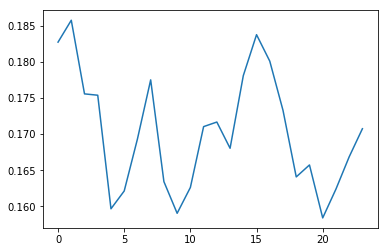

In [63]:
plt.plot(df.groupby( 'hour' ).mean()[ 'click' ]); # Fill here for the influence of the hour

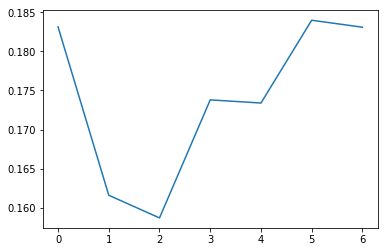

In [64]:
plt.plot(df.groupby( 'weekday' ).mean()[ 'click' ]); # Fill here for the influence of the day

# Preliminary work and first model

Start by understanding the features with few modalities:
'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.

<font color="red">**Question:**
    For instance, inspect the columns 'C15' (dimension of the advert) and 'site_category': visualize the clicks mean.
</font>

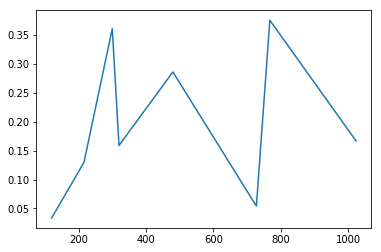

In [65]:
plt.plot(df.groupby('C15').mean()['click']) # Fill here: inspect 'C15' using '.groupby'

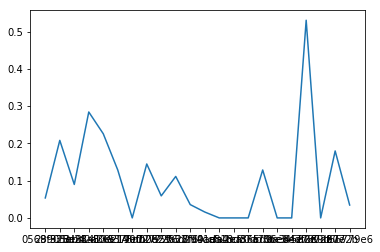

In [66]:
plt.plot(df.groupby('site_category').mean()['click']) # Fill here: inspect 'site_category' using '.groupby'

<font color="red">**Question:**
    Some site categories have a null click rate. Why? Display the 'count()' of each modality.
    <br><br>
    Hint: you can use the method ".value_counts()"
</font>

In [67]:

df.groupby( 'site_category' )['click'].value_counts() # Fill here

site_category  click
0569f928       0           406
               1            23
28905ebd       0        144146
               1         37874
335d28a8       0          3050
               1           301
3e814130       0         54159
               1         21508
42a36e14       0            48
               1            14
50e219e0       0        356335
               1         52586
5378d028       0            11
70fb0e29       0           520
               1            88
72722551       0           636
               1            40
75fa27f6       0          3561
               1           446
76b2941d       0          2481
               1            92
8fd0aea4       0           186
               1             3
9ccfa2ea       0             5
a818d37a       0            81
bcf865d9       0            16
c0dd3be3       0           894
               1           132
c706e647       0             1
da34532e       0             1
dedf689d       1           331
               0  

It is practical to visualize both columns in parallel:

In [68]:
col = 'site_category'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'count']
a.sort_values(by='count', ascending=False)

,mean,count
site_category,,
50e219e0,0.128597,408921.0
f028772b,0.179719,313339.0
28905ebd,0.208076,182020.0
3e814130,0.284245,75667.0
f66779e6,0.034564,6365.0
75fa27f6,0.111305,4007.0
335d28a8,0.089824,3351.0
76b2941d,0.035756,2573.0
c0dd3be3,0.128655,1026.0


<font color="red">
Diviser le jeu de données en un train et un test set (test_size = 0.1, random_state = 100)</font>

<font color="red">**Question:**
    Divide the dataset into a training and test set with sklearn (use the following options: test_size=0.1, random_state=100).
</font>

In [69]:
from sklearn.model_selection import train_test_split
y=df['click'].values
X=df.drop(['click'],axis=1)
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y,test_size=0.1,random_state=100)

# First work on a reduced number of features

<font color="red">**Question:**
    Put in a list the selected columns: 'hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21'.
</font>

In [70]:
some_columns = ['hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 
                'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21']

<font color="red"> - Importer CategoricalEncoder de sklearn.preprocessing.  
- Fitter le CategoricalEncoder sur les données de train restreintes aux colonnes ci-dessus.  
- Transformer les données de train et de test en dummies.
</font>

<font color="red">**Question:**
    <br>
    - Import OneHotEncoder from sklearn.preprocessing
    <br>
    - Transform the training and the test data restricted to the selected columns
</font>

In [71]:
Xtrain[some_columns].head()

,hour,weekday,C1,banner_pos,site_category,app_category,device_type,device_conn_type,C15,C16,C18,C21
92438,10,0,1010,1,50e219e0,0f2161f8,4,3,320,50,0,79
60898,22,1,1005,0,50e219e0,fc6fa53d,1,2,320,50,0,79
556199,4,0,1005,0,f028772b,07d7df22,1,2,320,50,0,182
193129,12,1,1005,1,f028772b,07d7df22,1,0,320,50,0,48
231985,13,6,1005,0,28905ebd,07d7df22,1,0,320,50,0,79


In [72]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder()
Xtrain_oh = ohe.fit_transform(Xtrain[some_columns]) # fit the transformation of Xtrain restricted to selected columns
Xtest_oh = ohe.transform(Xtest[some_columns]) # and transform Xtest restricted to selected columns

<font color="red">**Question:**
    What is the new number of features?
</font>

In [73]:
Xtrain_oh.shape

(900000, 183)

We have 183 new features now.

<font color="red">**Question:**
    Visualize the first row of the design matrix you have got. Do not forget to convert it into a "numpy.array" using the method ".toarray()"
</font>

In [74]:
print(Xtrain_oh.toarray()[0])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


<font color="red">**Question:**
    Import and fit a logistic regression model on your the encoded data
</font>

In [75]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs',C=1e5,max_iter=1000)
lr.fit(Xtrain_oh,ytrain)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=1000,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

<font color="red">
Avec predict et predict_proba, afficher les décisions dures et les décisions douces obtenues sur les données de test.</font>

<font color="red">**Question:**
    With '.predict' and 'predict_proba', display the hard and soft decision you get on test data.
</font>

In [76]:
hard = lr.predict(Xtest_oh)
soft = lr.predict_proba(Xtest_oh)

218


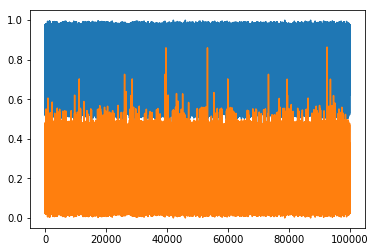

In [77]:

print(hard.sum())
plt.plot(soft)

<font color="red">**Question:**
    Compute the probability of error using sklearn.metrics 'accuracy_score' function. Comment.
</font>

In [78]:
from sklearn.metrics import accuracy_score
accuracy_score(hard,ytest)


0.83043

<font color="red">**Question:**
    Plot the ROC curve. Then compute the log loss and the Area Under the Curve ROC.
</font>

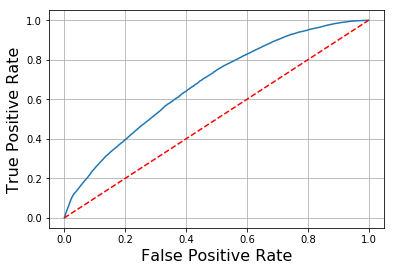

In [79]:
from sklearn.metrics import roc_curve
pfa, power,thre = roc_curve( ytest,soft[:,1] )
plt.plot(pfa,power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);

In [80]:
from sklearn.metrics import roc_auc_score , log_loss
log_loss( ytest,soft[:,1] ), roc_auc_score( ytest,soft[:,1] )

(0.42511736851988896, 0.6763129128448371)

<font color="red">**Question:**
    Import the 'plot_lift' function from 'utils.py' and plot the lift curve. What is the lift of the first fifth of the population identified by the test?
</font>

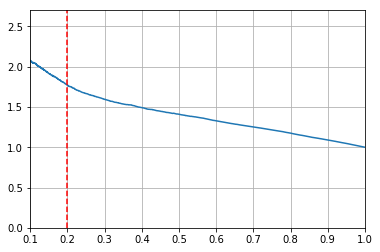

In [81]:
from utils import plotlift
plotlift( ytest,soft[:,1] )
# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 0.2 , linestyle='--', color='r') # Fill here

# Complete model

As an example, we now work on the 'site_id' column.
<font color="red">**Question:**
    <br>
    - For each modality, compute the number of occurrences in the dataset and the average of clicks for this modality 
    <br>
    - With 'sns.joiplot', represent the set of points (count, mean) for each modality
</font>

In [82]:
import seaborn as sns

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


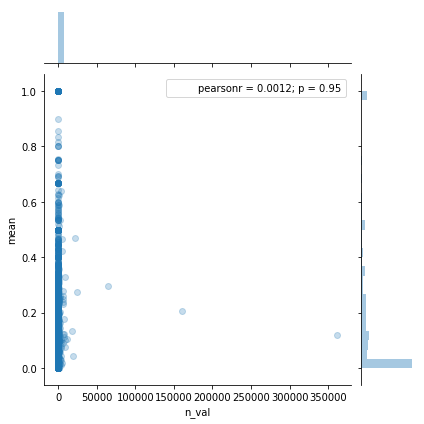

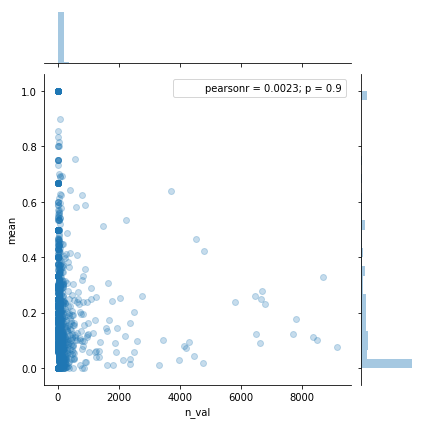

In [83]:
col = 'site_id'
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

<font color="red">**Question:**
    In the above commands, what does the alpha parameter stand for?
</font>

Alpha stands for ...

Several sites with a lot of occurrences in the dataset have a click frequency very different from the mean. It is relevant to keep the column 'site_id' at least for the modalities for which 'count' is very high.
<font color="red">**Question:**
    Do the same work on the 'device_id' column. What do you notice? What could be the isolated point?
</font>

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


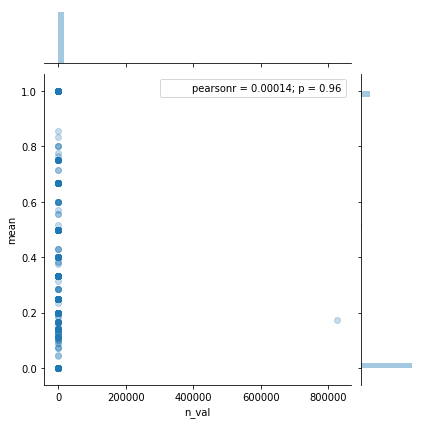

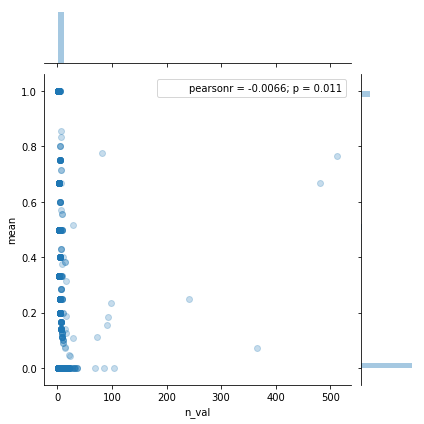

In [84]:
col = 'device_id' # Fill here
a = pd.DataFrame([df.groupby(col).mean()['click'], df.groupby(col).count()['click']]).transpose()
a.columns = ['mean', 'n_val']
sns.jointplot(a['n_val'], a['mean'], alpha=0.25);
thres = 10000
sns.jointplot(a[a['n_val']<thres]['n_val'], a[a['n_val']<thres]['mean'], alpha=0.25);

<font color="red">**Question**:   
    In the column df['device_id'], spot the value V corresponding to the largest number of 'count' (using '.value_counts' method). Create a new column df['user'] defined as follows:
</font>
$$
\text{user} = \left\{\begin{array}[h]{ll} \text{device_ip + device_model} & \text{if device_id = V}\\ \text{device_id} & \text{else.}\end{array}\right.
$$

In [85]:
df['device_id'].value_counts()

a99f214a    824918
0f7c61dc       512
c357dbff       481
936e92fb       366
afeffc18       242
987552d1       103
d857ffbb        98
cef4c8cc        93
b09da1c4        91
28dc8687        86
3cdb4052        81
02da5312        72
03559b29        69
096a6f32        36
0a04637d        36
d2e4c0ab        36
1de30ee7        33
f1d9c744        32
eec6d022        31
abab24a7        31
bbcf14e4        30
73b81e30        29
9af87478        28
c35f5168        27
2c112522        27
4e9e9550        23
468ee576        23
d2e5b3f2        23
4e05554e        23
69e39a30        22
             ...  
6e99ce4c         1
79de7b5e         1
334e7c51         1
e808804f         1
55d84d76         1
cf54d861         1
fc19a42f         1
d655d47a         1
508bc6ee         1
0ead863a         1
ef5ee851         1
593142f2         1
996e1e17         1
5a7f60ce         1
782df8e6         1
b5283e36         1
84f3041b         1
63a79383         1
54a06eda         1
381873c0         1
16b3509f         1
a117fcd4    

In [86]:
V = 'a99f214a' # Fill here
df['user'] = (df['device_ip'] + df['device_model']) * (df['device_id']==V) + df['device_id'] * (df['device_id']!=V)

<font color="red">**Question**:
    Drop the following columns: 'device_id','device_model','device_ip'
</font>

In [87]:
df=df.drop(['device_id','device_model','device_ip'],axis=1)

In [88]:
df.head()

,id,click,hour,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,...,C14,C15,C16,C17,C18,C19,C20,C21,weekday,user
0,3.983206e+18,0,15,1005,1,e151e245,7e091613,f028772b,ecad2386,7801e8d9,...,4687,320,50,423,2,39,100148,32,2,fb6566d3be87996b
1,7.756884e+18,0,7,1002,0,cb809abf,74acf31a,50e219e0,ecad2386,7801e8d9,...,17894,320,50,2039,2,39,100077,32,3,9b7af851
2,6.941774e+17,0,11,1005,0,85f751fd,c4e18dd6,50e219e0,e9739828,df32afa9,...,22684,320,50,2619,1,163,100055,71,0,748e298a3c55fad5
3,2.664154e+18,1,3,1005,0,85f751fd,c4e18dd6,50e219e0,a5184c22,b8d325c3,...,23222,320,50,2676,0,35,100176,221,2,a50da3d4c5cc73c1
4,1.480510e+19,0,2,1005,1,791b5571,fd13bc73,f028772b,ecad2386,7801e8d9,...,8330,320,50,761,3,175,100081,23,2,d5f88679a5bce124


<font color="red">**Question**:
    One could look at the similarity between 'site_id' and 'site_domain'. Merge those columns into a new 'site' column and delete the old 'site_id' and 'site_domain' columns.
</font>

In [89]:
df[['site_id','site_domain']]
df.groupby('site_id')['site_domain'].value_counts()

site_id   site_domain
00255fb4  240a9324         6
006ab81e  098df66b         5
00b73968  0640153c         1
00f5367d  c4e18dd6         2
00f648b7  ff3c109d        12
          c4e18dd6         9
          5575679a         2
00f7c6fc  c4e18dd6         3
0114bb39  9bf98a02         3
011b0fda  114d3cd8         1
011e5414  f6ab045d        11
          7e4d7218        10
          08facbad         5
          1e0acfb4         4
          c4e18dd6         3
          282151d4         1
          fd435614         1
0126d590  636ffdf6         1
01270328  3132fe8d       185
0129a661  d763fa78         4
013e516e  488b03a7         1
014428c1  c6bb6f3f         5
          f578c520         3
          1e0acfb4         2
          63fb5b87         2
          1ed2eeb8         1
          399c6e85         1
          82edec1a         1
          c4e18dd6         1
015cc1dc  e7e1349f         2
                        ... 
ff361da0  6dbd48f0       543
ff4425e5  c4e18dd6         2
          1e0acfb4   

In [90]:
df['site']=df['site_id']+df['site_domain']
df.drop(['site_id','site_domain'],axis=1)

,id,click,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,...,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
0,3.983206e+18,0,15,1005,1,f028772b,ecad2386,7801e8d9,07d7df22,1,...,320,50,423,2,39,100148,32,2,fb6566d3be87996b,e151e2457e091613
1,7.756884e+18,0,7,1002,0,50e219e0,ecad2386,7801e8d9,07d7df22,0,...,320,50,2039,2,39,100077,32,3,9b7af851,cb809abf74acf31a
2,6.941774e+17,0,11,1005,0,50e219e0,e9739828,df32afa9,cef3e649,1,...,320,50,2619,1,163,100055,71,0,748e298a3c55fad5,85f751fdc4e18dd6
3,2.664154e+18,1,3,1005,0,50e219e0,a5184c22,b8d325c3,0f2161f8,1,...,320,50,2676,0,35,100176,221,2,a50da3d4c5cc73c1,85f751fdc4e18dd6
4,1.480510e+19,0,2,1005,1,f028772b,ecad2386,7801e8d9,07d7df22,1,...,320,50,761,3,175,100081,23,2,d5f88679a5bce124,791b5571fd13bc73
5,1.591127e+19,0,0,1005,0,50e219e0,febd1138,82e27996,0f2161f8,1,...,320,50,2480,3,297,100111,61,0,189590f92ea4f8ba,85f751fdc4e18dd6
6,4.149473e+18,0,8,1010,1,50e219e0,03a08c3f,7801e8d9,0f2161f8,4,...,320,50,1722,0,35,100084,79,4,192d98b0,85f751fdc4e18dd6
7,1.085379e+19,0,4,1005,0,50e219e0,a5184c22,b8d325c3,0f2161f8,1,...,320,50,2676,0,35,100176,221,2,342b6e9ea0f5f879,85f751fdc4e18dd6
8,2.629918e+18,0,13,1010,1,50e219e0,8486dd4e,7801e8d9,0f2161f8,4,...,320,50,2036,3,47,-1,156,5,50dc7a55,85f751fdc4e18dd6
9,1.419062e+19,0,0,1010,1,50e219e0,04f2be5f,7801e8d9,0f2161f8,4,...,320,50,2602,0,163,100084,182,6,feb99a64,85f751fdc4e18dd6


In [109]:

df=df.drop(['site_id','site_domain'],axis=1)
df.head()

,id,click,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,...,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
0,3.983206e+18,0,15,1005,1,f028772b,ecad2386,7801e8d9,07d7df22,1,...,320,50,423,2,39,100148,32,2,fb6566d3be87996b,e151e2457e091613
1,7.756884e+18,0,7,1002,0,50e219e0,ecad2386,7801e8d9,07d7df22,0,...,320,50,2039,2,39,100077,32,3,9b7af851,cb809abf74acf31a
2,6.941774e+17,0,11,1005,0,50e219e0,e9739828,df32afa9,cef3e649,1,...,320,50,2619,1,163,100055,71,0,748e298a3c55fad5,85f751fdc4e18dd6
3,2.664154e+18,1,3,1005,0,50e219e0,a5184c22,b8d325c3,0f2161f8,1,...,320,50,2676,0,35,100176,221,2,a50da3d4c5cc73c1,85f751fdc4e18dd6
4,1.480510e+19,0,2,1005,1,f028772b,ecad2386,7801e8d9,07d7df22,1,...,320,50,761,3,175,100081,23,2,d5f88679a5bce124,791b5571fd13bc73


In [112]:
X=df.drop(['id','click'],axis=1)

<font color="red">**Question**:
    Once again, split the modified DataFrame df into a train and a test set (with options: test_size = 0.1, random_state = 100).
</font>

In [113]:
Xtrain, Xtest, ytrain, ytest =  train_test_split(X,y,test_size=0.1,random_state=100)

<font color="red">**Question**:
    Define a OneHotEncoder and then, 'fit_transform' the train set.
</font>

In [120]:
ohe = OneHotEncoder(handle_unknown='ignore')
new_columns = ['hour', 'weekday', 'C1', 'banner_pos', 'site_category', 'app_category', 
                'device_type', 'device_conn_type', 'C15', 'C16', 'C18', 'C21','user','site']
Xtrain_oh = ohe.fit_transform(Xtrain) # Fill here


<font color="red">**Question**:
    Transform the test set. If an error occurs, analyze it and try to solve it by modifying the parameter "handle_unkown" of the OneHotEncoder.
</font>

In [121]:
Xtest_oh = ohe.transform(Xtest) # Fill here

<font color="red">**Question**:
    What is the new number of features?
</font>

In [122]:
Xtest_oh.shape

(100000, 713334)

The new number of features is 713334

<font color="red">**Question**:
    How many modalities have been seen more than a 100 times?
</font>

In [129]:
# The following 'n_ones' vector below gives the number of '1' in each column/modality of the Xtrain_oh design matrix.
n_ones = np.array(Xtrain_oh.sum(axis=0))
# Fill here using 'n_ones'
n_ones

array([[1.8913e+04, 2.2163e+04, 2.7384e+04, ..., 2.0000e+01, 2.0000e+00,
        3.0000e+00]])

The list 'cols_to_keep' below is used to store the indices of the modalities seen more than a 100 times. You can notice the use of the 'enumerate' function.

In [134]:
useful = np.array(n_ones>100)[0]
cols_to_keep = [i for i,b in enumerate(useful) if b]
len(cols_to_keep)

1971

In [140]:
Xtrain_oh

<900000x713334 sparse matrix of type '<class 'numpy.float64'>'
	with 18000000 stored elements in Compressed Sparse Row format>


<font color="red">**Question**:
    Using only our restriction on the 'cols_to_keep' columns, retrain a logistic regression model and compare its performance in terms of 'log_loss' and 'roc_auc_curve'.
</font>

In [145]:
lr = LogisticRegression(solver='lbfgs',C=1e5,max_iter=1000)
lr.fit( Xtrain_oh[:,cols_to_keep], ytrain )
soft = lr.predict_proba(Xtest_oh[:,cols_to_keep])
hard = lr.predict(Xtest_oh[:,cols_to_keep])

/home/ubuntu/scikit-learn/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


0.83383


(0.4011664817364181, 0.7385331382362932)

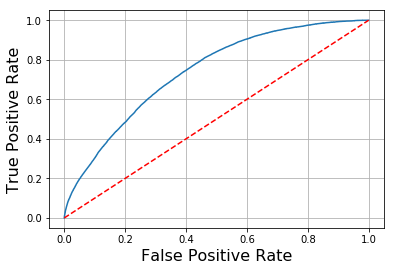

In [146]:
from sklearn.metrics import roc_curve
pfa, power,thre = roc_curve( ytest,soft[:,1] )
plt.plot(pfa,power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
print(accuracy_score(hard,ytest))
log_loss( ytest,soft[:,1] ), roc_auc_score( ytest,soft[:,1] )



# Gradient Boosting Decision Trees

<font color="red">**Question**:
    <br>
    - Import GradientBoostingClassifier from scikit learn. 
    <br>
    - Initialize it using 50 estimators and a learning rate of 0.8. Set 'verbose=True' to monitor the progress of the algorithm.
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance as in the previous step.
</font>

In [149]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(learning_rate=0.8,n_estimators=50,verbose=True) # Fill here

In [190]:
%time gb.fit( Xtrain_oh[:,cols_to_keep],ytrain )

      Iter       Train Loss   Remaining Time 
         1           0.8743            2.81m
         2           0.8646            2.83m
         3           0.8583            2.86m
         4           0.8535            2.84m
         5           0.8503            2.78m
         6           0.8464            2.70m
         7           0.8441            2.66m
         8           0.8418            2.60m
         9           0.8404            2.54m
        10           0.8383            2.47m
        20           0.8282            1.79m
        30           0.8234            1.19m
        40           0.8190           35.76s
        50           0.8163            0.00s
CPU times: user 3min 13s, sys: 27.1 s, total: 3min 40s
Wall time: 2min 56s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.8, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=True, warm_start=False)

0.83343


(0.4091871736006742, 0.7251893509766301)

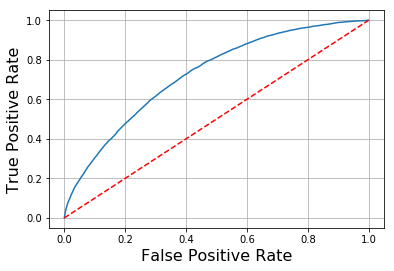

In [188]:
soft = gb.predict_proba(Xtest_oh[:,cols_to_keep])[:,1]
hard = gb.predict(Xtest_oh[:,cols_to_keep])
pfa, power,thre = roc_curve( ytest,soft )
plt.plot(pfa,power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
print(accuracy_score(hard,ytest))
log_loss(ytest, soft), roc_auc_score(ytest, soft)

<font color="red">**Question**:
    What does the 'gb.estimators_' output?
</font>

In [159]:
gb.estimators_

array([[DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7fcb30677dc8>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort='auto',
           random_state=<mtrand.RandomState object at 0x7fcb30677dc8>,
           splitter='best')],
       [DecisionTreeRegressor(criterion='friedman_mse', max_depth=3,
           max_features=None, max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, 

We now try to use the 'gb' classifier to generate features that will be relevant inputs for the logistic regression.
<font color="red">**Question**:
    With the 'gb.apply()' method, generate a transformation 'leafs_train' of the training set 'Xtrain_oh[:, cols_to_keep]' for which the nth column corresponds to the number of the leaf returned by the estimator n.
</font>

In [163]:
# Test here the gb.apply method on Xtrain[:, cols_to_keep]
gba=gb.apply(Xtrain_oh[:,cols_to_keep])
gba.shape

(900000, 50, 1)

In [174]:
gba[0:5,5,0]
gbat=gb.apply(Xtest_oh[:,cols_to_keep])

After your applied gb.apply on Xtrain_oh[:, cols_to_keep], remember that use have only one class to predict (click = 0 or 1). So, do not forget to slice your output with [:, :, 0] in order to keep, firstly, all the samples, and secondly all your 50 estimators.

Hint: you can have a look at the dimensions of your output with .shape !

In [175]:
leafs_train = pd.DataFrame( gba[:,:,0] ) # Fill here
leafs_test = pd.DataFrame( gbat[:,:,0] )

<font color="red">**Question**:
    Encode these new features into dummies.
</font>

In [180]:
ohe = OneHotEncoder( handle_unknown='ignore' ) # Fill here an argument if needed
leafs_train_oh = ohe.fit_transform(leafs_train)
leafs_test_oh = ohe.transform(leafs_test)

In [181]:
leafs_train_oh.shape

(900000, 396)

<font color="red">**Question**:
    With the "hstack" function, create a new matrix of features by concatenating horizontally our new features "leafs_train_oh" and "leafs_test_oh", and previous features used for logistic regression (e.g. in "Xtrain_oh[:, cols_to_keep]").
</font>
<br><br>
**Remark**: we use "hstack" from scipy.sparse (and not from numpy) because the output of our OneHotEncoder is a sparse array. You can verify it with the command "type(Xtrain_oh)".

In [182]:
from scipy.sparse import csr_matrix, hstack
Xtrain_concat = hstack([ leafs_train_oh , Xtrain_oh[:,cols_to_keep] ]) # Fill here
Xtest_concat = hstack([ leafs_test_oh, Xtest_oh[:,cols_to_keep]])

<font color="red">**Question**:
    Run a logistic regression on the new features and evaluate its performance as before.
</font>

In [183]:
lr = LogisticRegression(solver='lbfgs',C=1e5,max_iter=1000)
lr.fit( Xtrain_concat, ytrain )


/home/ubuntu/scikit-learn/sklearn/linear_model/logistic.py:757: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


ValueError: X has 1971 features per sample; expecting 2367

In [185]:
soft = lr.predict_proba(Xtest_concat)
hard = lr.predict(Xtest_concat)

0.83408


(0.3999551647217715, 0.7417677169188173)

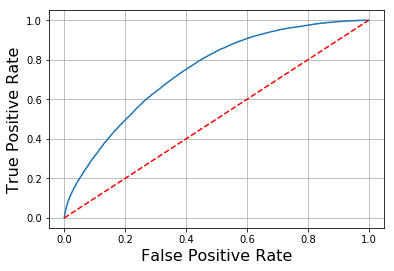

In [186]:
pfa, power,thre = roc_curve( ytest,soft[:,1] )
plt.plot(pfa,power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
print(accuracy_score(hard,ytest))
log_loss( ytest,soft[:,1] ), roc_auc_score( ytest,soft[:,1] )


<font color="red">**Question**:
    <br>
    - Import XGBClassifier from xgboost package.
    <br>
    - Initialize it using the same number of estimators and learning rate as before. Set the 'n_jobs' to -1.
    <br>
    - Fit it on the same columns 'cols_to_keep' of Xtrain_oh than for the previous logistic regression.
    <br>
    - Evaluate its performance and compare it to the GradientBoosting classifier of scikit learn. How is the error? Does it take more time to run?
</font>

In [189]:
from xgboost import XGBClassifier
xgb = XGBClassifier( learning_rate=0.8,n_estimators=50,n_jobs=-1 )
%time xgb.fit( Xtrain_oh[:,cols_to_keep],ytrain )


CPU times: user 37.7 s, sys: 3.71 s, total: 41.4 s
Wall time: 9.05 s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=50,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

0.83298


(0.40789665685489773, 0.7244454605414952)

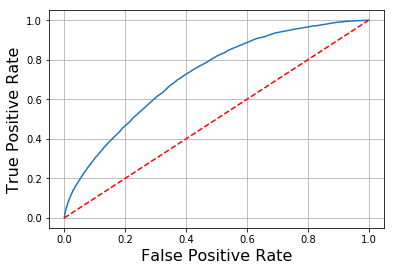

In [195]:
soft = xgb.predict_proba(Xtest_oh[:,cols_to_keep])[:,1]
hard = xgb.predict(Xtest_oh[:,cols_to_keep])
pfa, power,thre = roc_curve( ytest,soft )
plt.plot(pfa,power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
print(accuracy_score(hard,ytest))
log_loss(ytest, soft), roc_auc_score(ytest, soft)

The error of xgboost is bigger than GradientBoosting classifier when the number of estimators is not big enough and it takes less time now. 
When we increase the number of estimators to 1024 we gets the less rate of error and the better performence of roc,also take more time.

<font color="red">**Question**:
    Increase the number of estimators (e.g. 1024) and visualize the impact on performance. You might have to adapt the learning rate.
</font>

In [198]:
from xgboost import XGBClassifier
xgb = XGBClassifier( learning_rate=0.8,n_estimators=1024,n_jobs=-1 )
%time xgb.fit( Xtrain_oh[:,cols_to_keep],ytrain )


CPU times: user 10min 41s, sys: 47.9 s, total: 11min 28s
Wall time: 1min 29s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1024,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

0.83347


(0.3996554593976126, 0.7425692669531896)

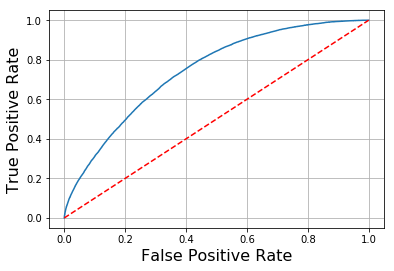

In [199]:
soft = xgb.predict_proba(Xtest_oh[:,cols_to_keep])[:,1]
hard = xgb.predict(Xtest_oh[:,cols_to_keep])
pfa, power,thre = roc_curve( ytest,soft )
plt.plot(pfa,power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
print(accuracy_score(hard,ytest))
log_loss(ytest, soft), roc_auc_score(ytest, soft)

# Features hashing and random forest

We restart with raw features before dummy encoding: Xtrain, Xtest.
<font color="red">**Question**:
    Display again the number of modalities per feature in Xtrain. Use '.nunique()'
</font>

In [203]:
Xtrain.nunique()

hour                    24
C1                       7
banner_pos               7
site_category           22
app_id                3054
app_domain             196
app_category            26
device_type              5
device_conn_type         4
C14                   2225
C15                      8
C16                      9
C17                    420
C18                      4
C19                     66
C20                    163
C21                     60
weekday                  7
user                701585
site                  5442
dtype: int64

We want to define a transformation which regroups the least frequent modalities into a label 'isRare'. In order to do so, we decide to define our own Transformer.
<font color="red">**Question**:
    Understand the different steps of 'fit' and 'transform'.
</font>

In [201]:
from sklearn.base import BaseEstimator, TransformerMixin

class MergeRareTransformer(BaseEstimator, TransformerMixin):
    
    def __init__(self, col_names, threshold):
        self.col_names = col_names
        self.threshold = threshold

    def fit(self, X, y=None):

        X = pd.DataFrame(X)
        counts_dict_list = []
        ################## READ THIS #########################
        for i in range(len(self.col_names)):
            
            serie = X[self.col_names[i]].value_counts()  # Série des counts de chaque modalité
            rare_indexes = serie[serie<self.threshold[i]].index  # A quoi correspondent ces indices ?
            frequent_indexes = serie[serie>=self.threshold[i]].index  # A quoi correspondent ces indices ?
            dico = {x:'isRare' for x in rare_indexes}
            dico.update({x: str(x) for x in frequent_indexes})
            counts_dict_list.append(dico)   # Quel est le dictionnaire obtenu ?
            
        ######################################################
            
        self.counts_dict_list_ = counts_dict_list
        return self

    def transform(self, X):

        Xt = pd.DataFrame()
        ################## READ THIS #########################
        for col, count_dict in zip(self.col_names, self.counts_dict_list_):
            Xt[col] = X[col].apply(lambda x:count_dict[x] if x in count_dict else 'isRare')
            # A quoi sert le "else 'isRare'" dans la transformation de la colonne ?
        ######################################################

        return Xt


<font color="red">**Question:**
    <br>
    - Fit and transform the training set. To do so, merge all mmodalities occuring at least 20 times in each column.
    <br>
    - Transform the test set.
</font>

In [205]:
mg = MergeRareTransformer(col_names=Xtrain.columns, threshold=[20]*len(Xtrain.columns))
Xtrain_mg = mg.fit_transform(Xtrain) # Fill here with fit_transform
Xtest_mg = mg.transform(Xtest)

<font color="red">**Question:**
   How many elements of the column Xtrain_mg['app_domain'] are now labeled as 'rare'? Use the '.value_counts()' method.
</font>

In [208]:
Xtrain_mg['app_domain'].value_counts()

7801e8d9    606390
2347f47a    116467
ae637522     41928
5c5a694b     25289
82e27996     16869
d9b5648e     15709
0e8616ad     14784
b9528b13     14284
b8d325c3     11953
aefc06bd      6644
df32afa9      6412
33da2e74      5911
6f7ca2ba      4990
5b9c592b      2448
885c7f3f      1468
5c620f04      1419
45a51db4      1219
b5f3b24a      1093
813f3323       544
0654b444       514
isRare         513
ad63ec9b       388
c6824def       306
15ec7f39       275
a8b0bf20       266
99b4c806       219
828da833       185
448ca2e3       167
f2f777fb       157
43cf4f06       149
47464e95        99
d6feb1a4        95
2b627705        89
1ea19ec4        72
db829551        69
6a0a3a9d        59
18eb4e75        56
0d79ee56        53
9ec164d3        51
e5d5313f        46
b12ff13e        42
27ee373d        36
b408d42a        30
5ac0b939        28
1ed56ded        27
bb6bcbae        27
3feeed1e        26
63f57be0        25
15c23f8e        25
7eec2ab0        24
7a9371fa        21
dcdba109        20
afdf1f54    

<font color="red">**Question:**
   In the new train set, display the number of modalities for each feature.
</font>

In [209]:
Xtrain_mg.nunique()

hour                  24
C1                     7
banner_pos             7
site_category         18
app_id               613
app_domain            53
app_category          19
device_type            5
device_conn_type       4
C14                 1339
C15                    8
C16                    9
C17                  381
C18                    4
C19                   63
C20                  148
C21                   60
weekday                7
user                 901
site                 889
dtype: int64

Les modalités sont des objets arbitraires du type : 234, 'isRare', etc. Nous allons les transformer en entiers avec le hashing trick.
<font color="red">
Pour comprendre le fonctionnement de la fonction "hash", l'appliquer à une chaîne de caractère quelconque.
</font>

Modalities are arbitrary object, such as '234', 'isRare', etc. We will now transorm them into integers with the hashing trick.
<font color="red">**Question:**
   To better understand how the 'hash' function is working, apply it to a string of your choice.
</font>

In [211]:
import hashlib
hash( 'isRare' ) # Fill here

-8921686062292348999

<font color="red">**Question:**
   Create two new datasets 'Xtrain_ha' and 'Xtest_ha' containing the output of the hashing process. Use the '.apply' method to transform iteratively the columns by mapping to each value its remainder in the euclidean division of the hash by 1000000. 
   Example:
</font>
</font>
<p>
<center>
2060777048690<font color="red">918393</font>  -->  918393
</center>
Remark: do not forget that the function 'hash' has to take a string as input.

In [215]:
Xtrain_ha = pd.DataFrame()
Xtest_ha = pd.DataFrame()
for col in Xtrain_mg.columns:
    Xtrain_ha[col] = Xtrain_mg[col].apply(lambda x:  hash(str(x)) % 1000000 ) # Fill here defining a lambda function
    Xtest_ha[col] = Xtest_mg[col].apply(lambda x:  hash(str(x)) % 1000000 )

<font color="red">**Question:**
   Visualize the content of the DataFrames you have obtained.
</font>

In [216]:
Xtrain_ha.head()

,hour,C1,banner_pos,site_category,app_id,app_domain,app_category,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21,weekday,user,site
92438,356800,722883,308882,67389,708206,152519,676104,728304,661989,496096,667711,597520,171462,772298,876307,133483,228935,772298,651001,991351
60898,132498,758049,772298,67389,184509,222881,714039,308882,595783,496096,667711,597520,171462,772298,876307,133483,228935,308882,651001,991351
556199,728304,758049,772298,693137,663626,152519,482402,308882,595783,932631,667711,597520,401646,772298,68222,133483,32359,772298,651001,443385
193129,174384,758049,308882,693137,663626,152519,482402,308882,772298,60330,667711,597520,296341,772298,200130,58156,78702,308882,651001,206459
231985,145351,758049,772298,284485,663626,152519,482402,308882,772298,343520,667711,597520,171462,772298,876307,835254,228935,207933,651001,117175


<font color="red">**Question:**
    <br>
    - Train a RandomForestClassifier on Xtrain_ha and evaluate its performance on Xtest_ha. One can chose 1024 estimators, min_samples_leaf=20 and verbose=1 in order to monitor the fitting step.
    <br>
    - How do you fix 'n_jobs'? 
</font>

In [218]:
from sklearn.ensemble import RandomForestClassifier # Fill here
rf = RandomForestClassifier( n_estimators=1024, min_samples_leaf=20, verbose=1 ,n_jobs=-1)
rf.fit( Xtrain_ha,ytrain )

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  3.4min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  6.1min
[Parallel(n_jobs=-1)]: Done 1024 out of 1024 | elapsed:  8.0min finished


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=20, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1024, n_jobs=-1,
            oob_score=False, random_state=None, verbose=1,
            warm_start=False)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    5.1s
[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:    6.6s finished
[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.3s
[Parallel(n_jobs=8)]: Done 184 tasks      | elapsed:    1.2s
[Parallel(n_jobs=8)]: Done 434 tasks      | elapsed:    2.8s
[Parallel(n_jobs=8)]: Done 784 tasks      | elapsed:    5.1s


0.83349


[Parallel(n_jobs=8)]: Done 1024 out of 1024 | elapsed:    6.7s finished


(0.40077170468088075, 0.7414914881667416)

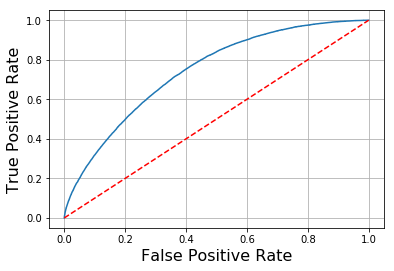

In [219]:
soft = rf.predict_proba(Xtest_ha)[:,1]
hard = rf.predict(Xtest_ha)
pfa, power,thre = roc_curve( ytest,soft )
plt.plot(pfa,power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
print(accuracy_score(hard,ytest))
log_loss(ytest, soft), roc_auc_score(ytest, soft)

<font color="red">**Question:**
   Compare with xgboost performance on the same hashed dataset.
</font>

In [220]:
xgb = XGBClassifier( learning_rate=0.8,n_estimators=1024,n_jobs=-1 )
%time xgb.fit( Xtrain_ha,ytrain )
 # the '%time' command will return the execution time of the fitting step


CPU times: user 13min 46s, sys: 1min 33s, total: 15min 19s
Wall time: 1min 55s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.8, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1024,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

<font color="red">**Question:**
    Plot the ROC and the lift curves for the obtained classifier (xgboost on hashed data).
</font>

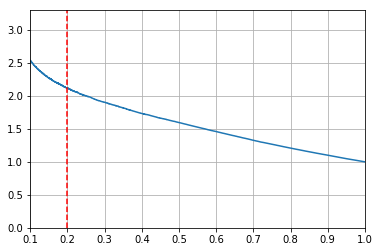

In [223]:
soft = xgb.predict_proba(Xtest_ha)[:,1]
hard = xgb.predict(Xtest_ha)

plotlift( ytest,soft )
# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 0.2 , linestyle='--', color='r') # Fill here
# Plot the lift curve here

0.83426


(0.3987778472014815, 0.7447887297580615)

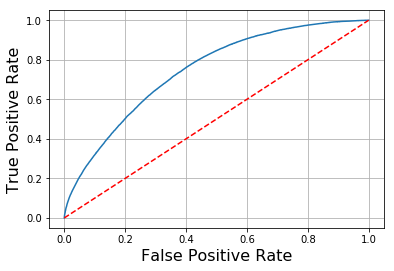

In [224]:
# Plot the ROC curve here
pfa, power,thre = roc_curve( ytest,soft )
plt.plot(pfa,power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
print(accuracy_score(hard,ytest))
log_loss(ytest, soft), roc_auc_score(ytest, soft)

Le hashing produit des colonnes d'entiers ordonnés arbitrairement. On se demande si on peut améliorer les performances en ajoutant d'autre colonnes hashées différemment.
<br>
<font color="red">Ajouter des colonnes de hash en hashant récursivement les précédentes : compléter le code ci-dessous.</font>

Hashing produces columns of integers arbitrarily ordered. One can wonder if adding more columns hashed in a different fashion would lead to better performance. 
<font color="red">**Question:**
    Add hashed columns by recursively hashing the previous ones: complete the following code. 
</font>

In [225]:
Xtrain_haha = pd.DataFrame(Xtrain_ha).copy()
Xtest_haha = pd.DataFrame(Xtest_ha).copy()

n_hash = 3
cols = Xtrain_ha.columns
for l in range(n_hash):
    for col in cols:
        Xtrain_haha[col + '-hash'] = Xtrain_haha[col].apply( lambda x: hash(str(x)) % 1000000 )
        Xtest_haha[col + '-hash'] = Xtest_haha[col].apply( lambda x: hash(str(x)) % 1000000 )
    cols = [col + '-hash' for col in cols]

<font color="red">**Question:**
    Evaluate the performance of a random forest and/or an xgboost clasifier on these enlarged dataset.
</font>

In [227]:
xgb = XGBClassifier( learning_rate=0.9,n_estimators=1024,n_jobs=-1 )
%time xgb.fit( Xtrain_haha,ytrain )
 # the '%time' command will return the execution time of the fitting step


CPU times: user 47min 13s, sys: 4min 10s, total: 51min 23s
Wall time: 7min 30s


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.9, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=1024,
       n_jobs=-1, nthread=None, objective='binary:logistic',
       random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=1)

0.83311


(0.40105923512631175, 0.7419869727865225)

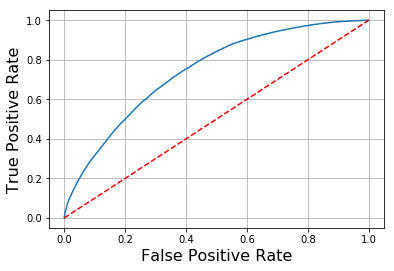

In [228]:
soft = xgb.predict_proba(Xtest_haha)[:,1]
hard = xgb.predict(Xtest_haha)
# Plot the ROC curve here
pfa, power,thre = roc_curve( ytest,soft )
plt.plot(pfa,power)
plt.grid()
plt.plot([0, 1], [0, 1], 'r--')
plt.xlabel('False Positive Rate', fontsize=16);
plt.ylabel('True Positive Rate', fontsize=16);
print(accuracy_score(hard,ytest))
log_loss(ytest, soft), roc_auc_score(ytest, soft)

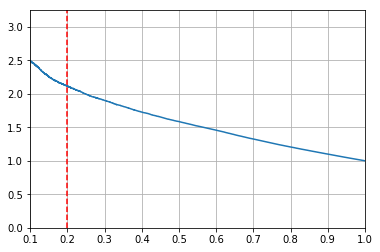

In [229]:
plotlift( ytest,soft )
# The following line just plots a vertical line for you to answer the second part of the question
plt.axvline(x= 0.2 , linestyle='--', color='r') # Fill here

Good job! :-) 